## In this notebook, I have taken a dataset which lebells a news as real or fake.
### I have used two Machine Learning mode, PassiveAgrelassifier and LinearRegression and compared there accuracy in detecting a fake news.
### The Dataset has four columns. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. 
### I have used the TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 to get the frequency of words present in the dataset

#### The idea of solving this problem is taken from towardsdatascience.com website
##### The dataset is obtained from data-flair.training/blogs/

In [2]:
ls

FakeNewsDetection.ipynb  news.csv  news.zip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [4]:
df = pd.read_csv('news.csv', index_col=0)

In [5]:
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.value_counts('label')

label
REAL    3171
FAKE    3164
dtype: int64

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


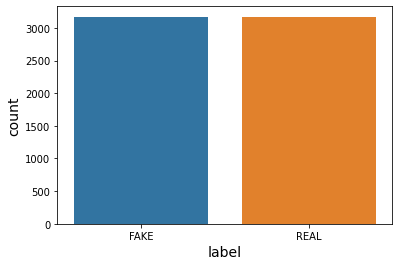

In [7]:
plt.xlabel("News Label", fontsize=14)
plt.ylabel("Counts", fontsize=14)
sns.countplot(df['label'])
plt.show()

### This is a balanced dataset as the number of target variables are nearly equal.

In [9]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 456.0+ KB


(None, (6335, 3))

#### Ther is no missing value

In [11]:
# Importing train_test split to split the dataset into training and testing parts
from sklearn.model_selection import train_test_split

In [12]:
x = df['text']

In [13]:
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
# Getting the term frequency of the dataset
Tiv = TfidfVectorizer(stop_words='english', max_df=0.7)

In [16]:
X_train_vec = Tiv.fit_transform(X_train)

In [17]:
X_test_vec = Tiv.transform(X_test)

### Training Models for prediction

In [19]:
pac = PassiveAggressiveClassifier(max_iter=50)

In [20]:
pac.fit(X_train_vec, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [21]:
y_pac = pac.predict(X_test_vec)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
accuracy_score(y_test, y_pac)

0.9400157853196527

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [27]:
y_lr = lr.predict(X_test_vec)

In [28]:
accuracy_score(y_test, y_lr)

0.9297553275453828

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(X_train_vec, y_train)

KNeighborsClassifier()

In [32]:
y_knn = knn.predict(X_test_vec)

In [33]:
accuracy_score(y_test, y_knn)

0.5824782951854776

In [34]:
confusion_matrix(y_test, y_pac)

array([[612,  39],
       [ 37, 579]])

### PassiveAgrelassifier and LinearRegression can make prediction of over 90%